## HW 5
## Sogol Peik Mortazavi
## 401112054

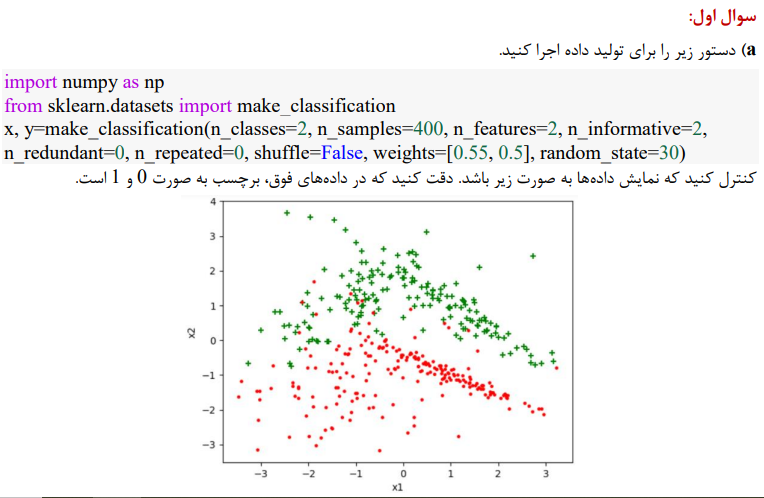

In [1]:
import numpy as np
from sklearn.datasets import make_classification
x, y=make_classification(n_classes=2, n_samples=400, n_features=2, n_informative=2,
n_redundant=0, n_repeated=0, shuffle=False, weights=[0.55, 0.5], random_state=30)

Text(0, 0.5, 'x2')

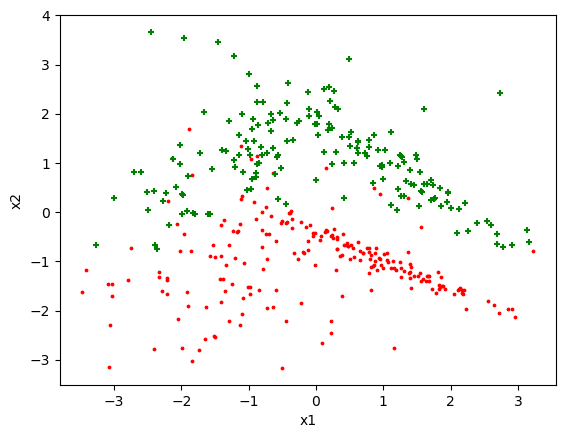

In [2]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
ax.scatter(x[y==0,0],x[y==0,1],label='Class 0',marker='.',color='red',s=12)
ax.scatter(x[y==1,0],x[y==1,1],label='Class 1',marker='+',color='green',s=20)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [3]:
a=np.ones((1,400))
X=np.concatenate((a.T,x),axis=1)
print(X.shape)
print(X)

(400, 3)
[[ 1.         -0.6390345   0.80053014]
 [ 1.         -1.36185809 -0.15612486]
 [ 1.         -0.80567539 -0.71696779]
 ...
 [ 1.         -0.88097209  2.56931889]
 [ 1.          0.19152331  1.79417499]
 [ 1.          0.602091    1.31168939]]


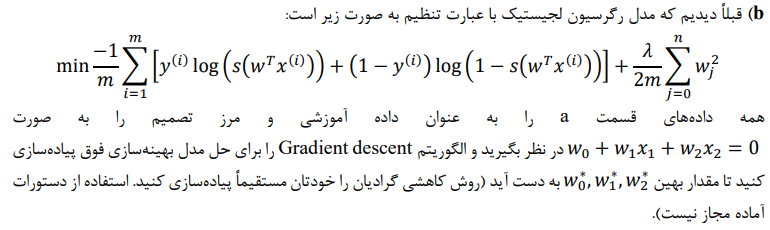

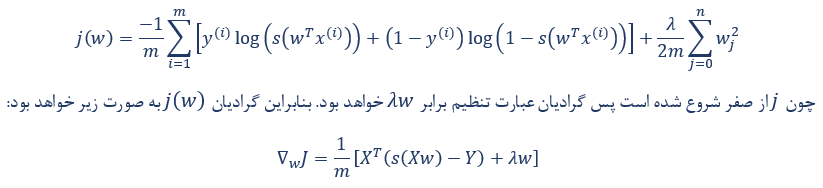

optimal w: [-0.13349716  0.41949343  2.97266114]
number of iterations:  1241


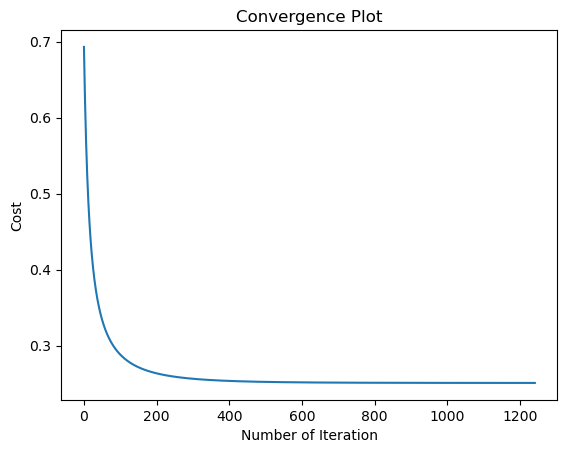

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X,y,w,landa):
    m = len(y)
    h = sigmoid(X @ w)
    J = (-1/m)* np.sum(y * np.log(h) + (1-y) * np.log(1-h))+(landa/ (2*m)) * np.sum(w**2)
    gradient =  (1 / m) * (X.T @ (h - y) + landa * w)
    return J , gradient

costs = []
def gradient_descent(X, y, w0, p, landa):
    w = w0
    m = len(y)
    k = 0
    while True:
        J , gradient = cost_function(X,y,w,landa)
        w -= p * gradient
        costs.append(J)
        if ((np.linalg.norm(gradient)< 0.001) | (k>2000)):
            break
        k += 1
    return w , k


w = np.zeros(X.shape[1])
p = 0.1       #learning rate
landa = 0.1   #regularization rate

w_optimal , k = gradient_descent(X, y, w, p , landa)
print('optimal w:',w_optimal)
print('number of iterations: ', k)

iteration=list(range(k+1))
plt.plot(iteration,costs)
plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.title("Convergence Plot")
plt.show()

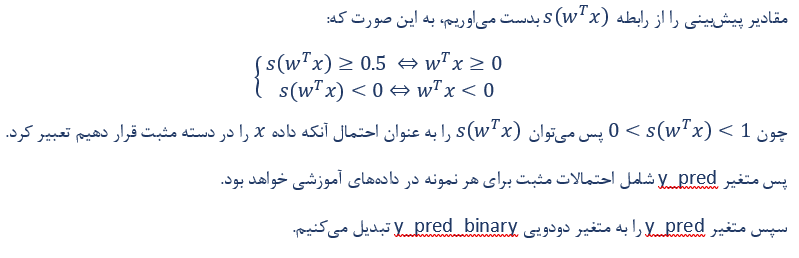

In [5]:
y_pred= sigmoid(X @ w_optimal)
y_pred_binary=(y_pred>=0.5).astype(int)

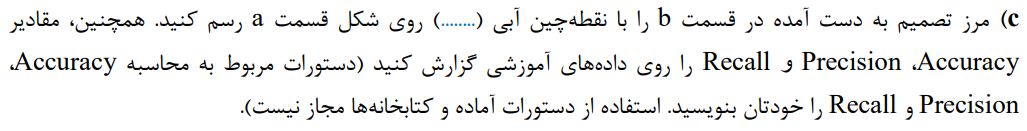

Text(0, 0.5, 'x2')

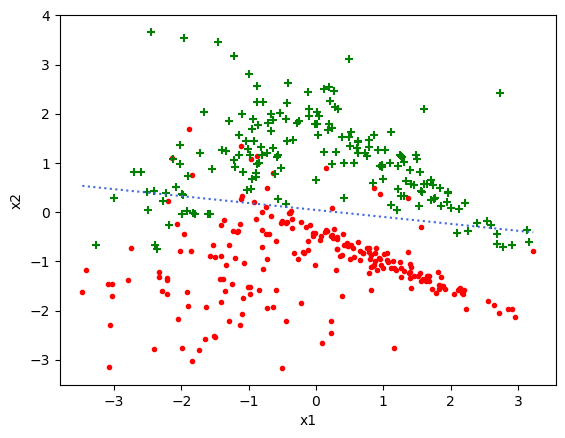

In [6]:
w0=w_optimal[0]
w1=w_optimal[1]
w2=w_optimal[2]

x1_min , x1_max = X[:,1].min() , X[:,1].max()
xx1=np.linspace(x1_min,x1_max,100)
xx2=(-w0 - w1*xx1)/w2

fig, ax=plt.subplots()
ax.plot(xx1,xx2,linestyle='dotted',color='royalblue',label='Decision Boundary')
ax.scatter(x[y==0,0],x[y==0,1],label='Class 0',marker='.',color='red')
ax.scatter(x[y==1,0],x[y==1,1],label='Class 1',marker='+',color='green')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# محاسبه معیارهای ارزیابی
## روش اول

In [7]:
#metrics

TP=((y_pred_binary==1) & (y==1)).sum()
print('TP: ',TP)
TN=((y_pred_binary==0) & (y==0)).sum()
print("TN: ",TN)
FP=((y_pred_binary==1) & (y==0)).sum()
print('FP: ',FP)
FN=((y_pred_binary==0) & (y==1)).sum()
print('FN: ',FN)

accuracy=100*((TP+TN)/(TP+FP+FN+TN))
print('accuracy: ',accuracy)
precision=100*((TP)/(TP+FP))
print('precision: ',precision)
recall=100*((TP)/(TP+FN))
print('recall: ',recall)
f_score=2*((precision*recall)/(precision+recall))
print('f_score',f_score)

TP:  157
TN:  207
FP:  16
FN:  20
accuracy:  91.0
precision:  90.7514450867052
recall:  88.70056497175142
f_score 89.71428571428572


## روش دوم

In [8]:
import pandas as pd
def conf_mat(y, y_pred):
    y= list(y)
    y_pred=list(y_pred)
    count=len(y)
    labels=[0, 1]
    confusion_mat =np.zeros(shape = (2, 2), dtype = int)
    for i in range(2):
        for j in range(2):
            confusion_mat[i][j] = len([k for k in range(count) if y[k] == labels[i] and y_pred[k] == labels[j]])
    return confusion_mat

def evaluation(y, y_pred):
    confusion_mat = conf_mat(y, y_pred)
    tn=confusion_mat[0, 0]
    fp=confusion_mat[0, 1]
    fn=confusion_mat[1, 0]
    tp =confusion_mat[1, 1]
    print(pd.Series({
        "Accuracy": (tp + tn) / (tn + fp + fn + tp),
        "Precision": tp / (tp + fp),
        "Recall": tp / (tp + fn),
        "F1-score": (2 * tp) / ((2 * tp) + fn + fp)
    }))
    print('--------------------------------------')
    print('TP:', tp)
    print('TN:', tn)
    print('FP:', fp)
    print('FN:', fn)
    
evaluation(y,y_pred_binary)


Accuracy     0.910000
Precision    0.907514
Recall       0.887006
F1-score     0.897143
dtype: float64
--------------------------------------
TP: 157
TN: 207
FP: 16
FN: 20


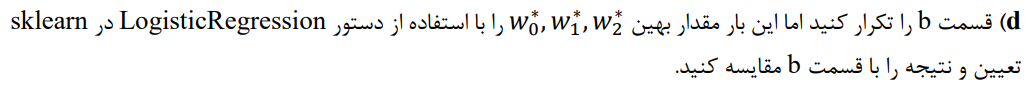

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x,y)
w0=model.intercept_[0]
w1 , w2=model.coef_[0]
print('optimal w:',[w0,w1,w2])

y_pred=model.predict(x)

#metrics

TP=((y_pred==1) & (y==1)).sum()
print('TP: ',TP)
TN=((y_pred==0) & (y==0)).sum()
print("TN: ",TN)
FP=((y_pred==1) & (y==0)).sum()
print('FP: ',FP)
FN=((y_pred==0) & (y==1)).sum()
print('FN: ',FN)

accuracy=100*((TP+TN)/(TP+FP+FN+TN))
print('accuracy: ',accuracy)
precision=100*((TP)/(TP+FP))
print('precision: ',precision)
recall=100*((TP)/(TP+FN))
print('recall: ',recall)
f_score=2*((precision*recall)/(precision+recall))
print('f_score',f_score)

optimal w: [-0.14110766512405742, 0.390361644993348, 2.7978273775240265]
TP:  157
TN:  207
FP:  16
FN:  20
accuracy:  91.0
precision:  90.7514450867052
recall:  88.70056497175142
f_score 89.71428571428572


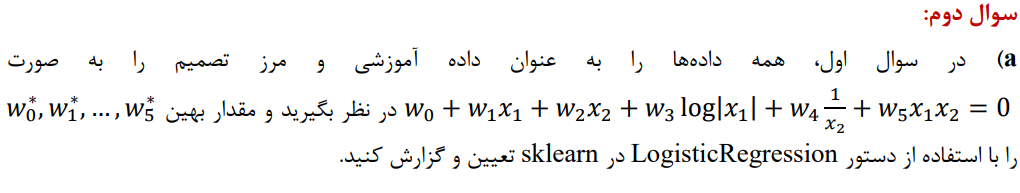

In [12]:
import numpy as np
from sklearn.datasets import make_classification
x, y=make_classification(n_classes=2, n_samples=400, n_features=2, n_informative=2,
n_redundant=0, n_repeated=0, shuffle=False, weights=[0.55, 0.5], random_state=30)

#تعریف ویژگی های جدید و افزودن آن ها به ماتریس ویژگی ها

X3=np.log(np.abs(x[:,0])).reshape(-1,1)
X4=1/x[:,1].reshape(-1,1)
X5=(x[:,0]*x[:,1]).reshape(-1,1)

X=np.concatenate((x,X3,X4,X5),axis=1)
print('features: \n',X)
model1=LogisticRegression()
model1.fit(X,y)

w0=model1.intercept_[0]
w1,w2,w3,w4,w5=model1.coef_[0]
w_opt=[w0,w1,w2,w3,w4,w5]
print('\n optimal w:',w_opt)

y_pred1=model1.predict(X)

features: 
 [[-0.6390345   0.80053014 -0.44779683  1.24917221 -0.51156638]
 [-1.36185809 -0.15612486  0.30885001 -6.40513001  0.2126199 ]
 [-0.80567539 -0.71696779 -0.21607436 -1.3947628   0.5776433 ]
 ...
 [-0.88097209  2.56931889 -0.12672934  0.38920821 -2.26349823]
 [ 0.19152331  1.79417499 -1.65274575  0.55735924  0.34362633]
 [ 0.602091    1.31168939 -0.50734668  0.76237561  0.78975638]]

 optimal w: [0.061130244412968014, 0.5033495649627687, 3.0962536853240827, 1.1034558004564043, -0.0005643705925635644, 0.48633265757850125]


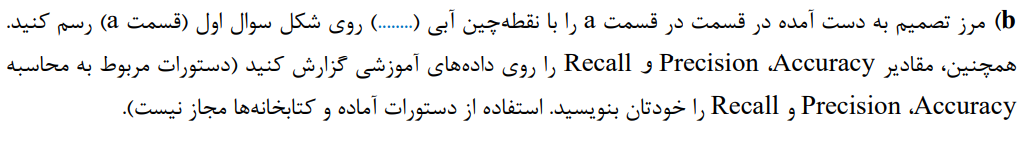

Text(0, 0.5, 'x2')

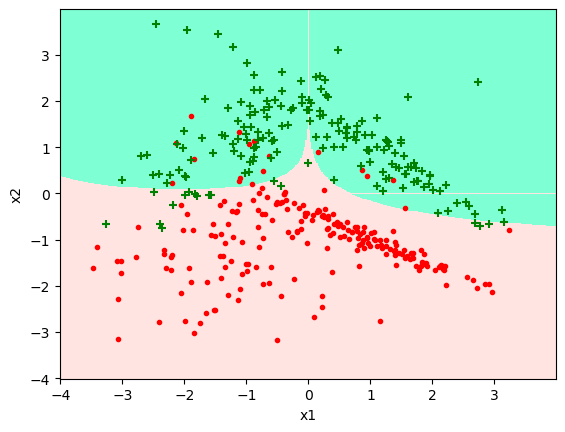

In [32]:
def equation(w, x1, x2):
    return w0 + w1 * x1 + w2 * x2 + w3 * np.log(np.abs(x1)) + w4 * (1/x2) + w5 * x1 * x2

from matplotlib.colors import ListedColormap
x1=np.arange( -4 , 4 , 0.02 )
x2=np.arange( -4 , 4 , 0.02 )
x1_mesh, x2_mesh=np.meshgrid(x1,x2)
x_agg=np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T
y_mesh=equation(w_opt,x_agg[:,0],x_agg[:,1])
y_mesh=y_mesh.reshape(x1_mesh.shape)
colors = [ "mistyrose" , "aquamarine" ]
colormap = ListedColormap(colors)

fig, ax=plt.subplots()
ax.pcolormesh(x1_mesh, x2_mesh, y_mesh>=0, cmap=colormap)
ax.scatter(x[y==0][:,0],x[y==0][:,1],label='Class 0',marker='.',color='red')
ax.scatter(x[y==1][:,0],x[y==1][:,1],label='Class 1',marker='+',color='green')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [18]:
TP=((y_pred1==1) & (y==1)).sum()
print('TP: ',TP)
TN=((y_pred1==0) & (y==0)).sum()
print("TN: ",TN)
FP=((y_pred1==1) & (y==0)).sum()
print('FP: ',FP)
FN=((y_pred1==0) & (y==1)).sum()
print('FN: ',FN)
print('-----------------------------------')
accuracy=100*((TP+TN)/(TP+FP+FN+TN))
print('accuracy: ',accuracy)
precision=100*((TP)/(TP+FP))
print('precision: ',precision)
recall=100*((TP)/(TP+FN))
print('recall: ',recall)
f_score=2*((precision*recall)/(precision+recall))
print('f_score',f_score)

TP:  160
TN:  206
FP:  17
FN:  17
-----------------------------------
accuracy:  91.5
precision:  90.3954802259887
recall:  90.3954802259887
f_score 90.3954802259887
